In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Train

In [474]:
train = pd.read_csv('./EDA_TRAIN_MOSQ.csv')
train.head(1)

,Unnamed: 0,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year,Species_RESTUANS,Species_PIPIENS,Species_SALINARIUS,Species_TARSALIS,Species_ERRATICUS,Species_UNSPECIFIED CULEX,Species_TERRITANS,Species_PIPIENS/RESTUANS
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,149,5,2007,0,0,0,0,0,0,0,1


In [475]:
# Date needs to be set as datetime
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)

In [476]:
# Transforming object features to categorical features
train['Address'] = train['Address'].astype('category')
train['Street']  = train['Street'].astype('category')
train['Trap']    = train['Trap'].astype('category')
train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].astype('category')

In [477]:
# Drop Unnamed
train = train.drop(['Unnamed: 0', 'Day', 'Month', 'Year'], axis=1)

In [478]:
train.shape

(9693, 19)

In [479]:
train['Date'].min()

Timestamp('2007-05-29 00:00:00')

In [480]:
train['Date'].max()

Timestamp('2013-09-26 00:00:00')

In [481]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 19 columns):
Date                         9693 non-null datetime64[ns]
Address                      9693 non-null category
Block                        9693 non-null int64
Street                       9693 non-null category
Trap                         9693 non-null category
AddressNumberAndStreet       9693 non-null category
Latitude                     9693 non-null float64
Longitude                    9693 non-null float64
AddressAccuracy              9693 non-null int64
NumMosquitos                 9693 non-null int64
WnvPresent                   9693 non-null int64
Species_RESTUANS             9693 non-null int64
Species_PIPIENS              9693 non-null int64
Species_SALINARIUS           9693 non-null int64
Species_TARSALIS             9693 non-null int64
Species_ERRATICUS            9693 non-null int64
Species_UNSPECIFIED CULEX    9693 non-null int64
Species_TERRITANS            9693 n

## Load Test

In [482]:
test = pd.read_csv('./EDA_TEST.csv')
test.head(1)

,Unnamed: 0,Id,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Day,Month,Year,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS
0,0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,149.0,5.0,2007.0,0,0,0,1,0,0,0,0


In [483]:
# Date needs to be set as datetime
test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)

In [484]:
# Transforming object features to categorical features
test['Address'] = test['Address'].astype('category')
test['Street']  = test['Street'].astype('category')
test['Trap']    = test['Trap'].astype('category')
test['AddressNumberAndStreet'] = test['AddressNumberAndStreet'].astype('category')

In [485]:
# Drop Unnamed
test = test.drop(['Unnamed: 0', 'Day', 'Month', 'Year'], axis=1)

In [486]:
test.shape

(116293, 18)

In [487]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 18 columns):
Id                           116293 non-null int64
Date                         116293 non-null datetime64[ns]
Address                      116293 non-null category
Block                        116293 non-null int64
Street                       116293 non-null category
Trap                         116293 non-null category
AddressNumberAndStreet       116293 non-null category
Latitude                     116293 non-null float64
Longitude                    116293 non-null float64
AddressAccuracy              116293 non-null int64
Species_ERRATICUS            116293 non-null int64
Species_SALINARIUS           116293 non-null int64
Species_UNSPECIFIED CULEX    116293 non-null int64
Species_PIPIENS/RESTUANS     116293 non-null int64
Species_TERRITANS            116293 non-null int64
Species_RESTUANS             116293 non-null int64
Species_PIPIENS              116293 non-null int

# Load Weather 

In [488]:
weather = pd.read_csv('./Weather_BS.csv')
weather.head(1)

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
0,0,1,2007-05-01,83,50,67.0,56.0,0.0,0.0,29.1,29.82,1.7,27,9.2,41.995,-87.933


In [489]:
# Drop Unnamed
weather = weather.drop(['Unnamed: 0'], axis=1)

In [490]:
#Setting Date to datetime
weather["Date"] = pd.to_datetime(weather["Date"], infer_datetime_format=True)

In [491]:
#Setting Date as index
weather = weather.set_index('Date')

In [492]:
weather.head(2)

,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
Date,,,,,,,,,,,,,,
2007-05-01,1,83,50,67.0,56.0,0.0,0.0,29.10,29.82,1.7,27,9.2,41.995,-87.933
2007-05-02,1,59,42,51.0,47.0,1.0,0.0,29.38,30.09,13.0,4,13.4,41.995,-87.933


In [493]:
#Feature engineering:  New rolling features for preciptation and average temperature

#Precipitation
weather['15day_precip'] = weather['PrecipTotal'].rolling(15, min_periods=1).sum()
weather['30day_precip'] = weather['PrecipTotal'].rolling(30, min_periods=1).sum()
weather['90day_precip'] = weather['PrecipTotal'].rolling(90, min_periods=1).sum()

#Average temperature
weather['15day_Tavg'] = weather['Tavg'].rolling(15, min_periods=1).sum()
weather['30day_Tavg'] = weather['Tavg'].rolling(30, min_periods=1).sum()
weather['90day_Tavg'] = weather['Tavg'].rolling(90, min_periods=1).sum()

In [494]:
weather = weather.reset_index()
weather.shape

(1472, 21)

In [495]:
weather['Date'].min()

Timestamp('2007-05-01 00:00:00')

In [496]:
weather['Date'].max()

Timestamp('2014-10-31 00:00:00')

In [497]:
weather.head()

,Date,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long,15day_precip,30day_precip,90day_precip,15day_Tavg,30day_Tavg,90day_Tavg
0,2007-05-01,1,83,50,67.0,56.0,0.0,0.000,29.10,29.82,1.7,27,9.2,41.995,-87.933,0.000,0.000,0.000,67.0,67.0,67.0
1,2007-05-02,1,59,42,51.0,47.0,1.0,0.000,29.38,30.09,13.0,4,13.4,41.995,-87.933,0.000,0.000,0.000,118.0,118.0,118.0
2,2007-05-03,1,66,46,56.0,48.0,0.0,0.000,29.39,30.12,11.7,7,11.9,41.995,-87.933,0.000,0.000,0.000,174.0,174.0,174.0
3,2007-05-04,1,66,49,58.0,50.0,1.0,0.001,29.31,30.05,10.4,8,10.8,41.995,-87.933,0.001,0.001,0.001,232.0,232.0,232.0
4,2007-05-05,1,66,53,60.0,49.0,0.0,0.001,29.40,30.10,11.7,7,12.0,41.995,-87.933,0.002,0.002,0.002,292.0,292.0,292.0


## Merging Train and Weather

In [498]:
train = pd.merge(train, weather, how='left', on='Date')

In [499]:
# train2 = train.merge(weather, how='left', on='Date') to see columns x and y

In [500]:
train.shape

(9693, 39)

In [501]:
pd.set_option('max_columns', None) #to see all dataframe

In [502]:
train.head()

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_RESTUANS,Species_PIPIENS,Species_SALINARIUS,Species_TARSALIS,Species_ERRATICUS,Species_UNSPECIFIED CULEX,Species_TERRITANS,Species_PIPIENS/RESTUANS,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long,15day_precip,30day_precip,90day_precip,15day_Tavg,30day_Tavg,90day_Tavg
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,0,0,0,0,0,0,0,1,1,88,60,74.0,65.0,1.0,0.0,29.39,30.11,5.8,18,6.5,41.995,-87.933,1.662,1.795,1.795,967.0,1835.0,1835.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,0,0,0,0,0,0,0,1,88,60,74.0,65.0,1.0,0.0,29.39,30.11,5.8,18,6.5,41.995,-87.933,1.662,1.795,1.795,967.0,1835.0,1835.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,0,0,0,0,0,0,0,1,88,60,74.0,65.0,1.0,0.0,29.39,30.11,5.8,18,6.5,41.995,-87.933,1.662,1.795,1.795,967.0,1835.0,1835.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,0,0,0,0,0,0,0,1,1,88,60,74.0,65.0,1.0,0.0,29.39,30.11,5.8,18,6.5,41.995,-87.933,1.662,1.795,1.795,967.0,1835.0,1835.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,0,0,0,0,0,0,0,1,88,60,74.0,65.0,1.0,0.0,29.39,30.11,5.8,18,6.5,41.995,-87.933,1.662,1.795,1.795,967.0,1835.0,1835.0


In [503]:
len(train['Trap'].unique())

136

Plot number of mosquitos with temperatures

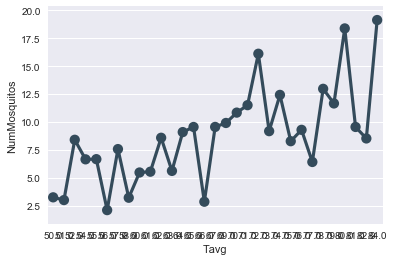

In [504]:
_=sns.pointplot(x=train['Tavg'], y=train['NumMosquitos'], markers="o", ci =0)
sns.set(font_scale=1, rc={'figure.figsize':(12, 10)}, palette="Blues_d")
plt.xticks(rotation=0)
plt.show()


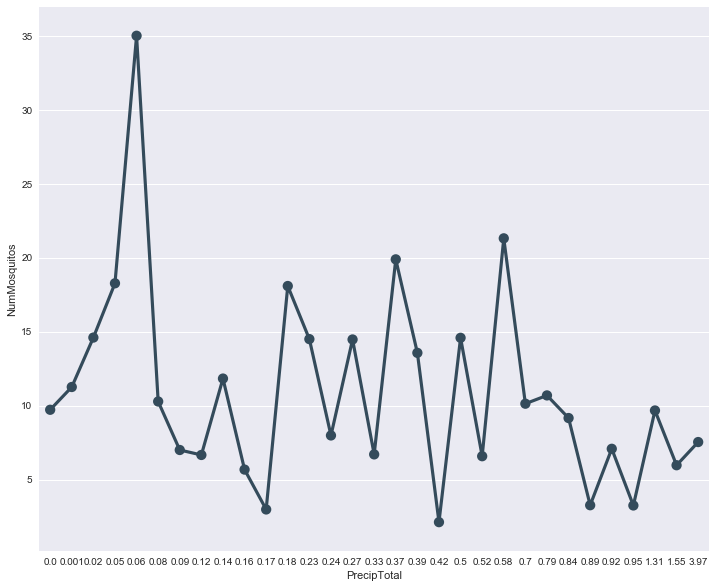

In [505]:
_=sns.pointplot(x=train['PrecipTotal'], y=train['NumMosquitos'], markers="o", ci =0)
sns.set(font_scale=1, rc={'figure.figsize':(12, 10)}, palette="Blues_d")
plt.xticks(rotation=0)
plt.show()

## Merging Test and Weather

In [506]:
test = pd.merge(test, weather, how='left', on='Date')

In [507]:
test.shape

(116293, 38)

In [508]:
test.head(3)

,Id,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long,15day_precip,30day_precip,90day_precip,15day_Tavg,30day_Tavg,90day_Tavg
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,0,1,0,0,0,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,0,0,0,1,0,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,0,0,0,0,1,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0


In [509]:
len(test['Trap'].unique())

149

## MODEL 1

In [510]:
#Define Predictors and Target for Baseline
X = train.drop(['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 'WnvPresent', 'Date', 'NumMosquitos','Trap'], axis=1)
y = train['WnvPresent']

In [511]:
test = test.drop(['Id','Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy','Date','Trap'], axis=1)

In [512]:
X.columns

Index(['Latitude', 'Longitude', 'Species_RESTUANS', 'Species_PIPIENS',
       'Species_SALINARIUS', 'Species_TARSALIS', 'Species_ERRATICUS',
       'Species_UNSPECIFIED CULEX', 'Species_TERRITANS',
       'Species_PIPIENS/RESTUANS', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'WetBulb', 'CodeSum', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Lat', 'Long', '15day_precip',
       '30day_precip', '90day_precip', '15day_Tavg', '30day_Tavg',
       '90day_Tavg'],
      dtype='object')

In [513]:
X.shape

(9693, 30)

In [514]:
test.shape

(116293, 30)

In [515]:
#Scale train data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_s = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [516]:
#Scale test data
test = pd.DataFrame(ss.transform(test), columns=test.columns)

In [517]:
#Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score

In [518]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7269, 30) (7269,)
(2424, 30) (2424,)


In [519]:
#Function to evaluate models using confusion matrix and sumary of scores
def model_evaluation(y_test, predictions, model=None, X=None):
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(data = cm, columns = ['Predicted WNV', 'Predicted not WNV',
                                           ], index = ['Actual WNV', 'Actual not WNV'])
    print(cm_df)
    print(metrics.classification_report(y_test, predictions))

## 1.1 Logistic Regression

In [520]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [521]:
from sklearn.metrics import roc_auc_score

In [522]:
#Model 0.1 Logistic Regression X-train , X test
lr = LogisticRegression()
lr.fit(X_train, y_train)
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
y_hat_lr = lr.predict(X_test)
y_hat_lr_tr = lr.predict(X_train)
print("log reg score train: {}".format(score_train))
print("log reg score test: {}".format(score_test))

log reg score train: 0.9481359196588252
log reg score test: 0.9476072607260726


In [523]:
model_evaluation(y_test, y_hat_lr, model=lr)

                Predicted WNV  Predicted not WNV
Actual WNV               2297                  1
Actual not WNV            126                  0
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2298
          1       0.00      0.00      0.00       126

avg / total       0.90      0.95      0.92      2424



In [524]:
pred_prob_lr = lr.predict_proba(X_train)

probas_lr = []
for p in pred_prob_lr:
    probas_lr.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_lr)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8150123312155253


In [525]:
pred_prob_lr = lr.predict_proba(X_test)

probas_lr = []
for p in pred_prob_lr:
    probas_lr.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_lr)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7986240623316341


## 1.2 Random Forest

In [526]:
#Model 0.2:  KNN Classifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)
y_hat_knn = knn.predict(X_test)
y_hat_knn_tr = knn.predict(X_train)
print("KNN classifier score train: {}".format(score_train))
print("KNN classifier score test: {}".format(score_test))

KNN classifier score train: 0.9517127527858027
KNN classifier score test: 0.9443069306930693


In [527]:
model_evaluation(y_test, y_hat_knn, model = knn)

                Predicted WNV  Predicted not WNV
Actual WNV               2283                 15
Actual not WNV            120                  6
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2298
          1       0.29      0.05      0.08       126

avg / total       0.92      0.94      0.93      2424



In [528]:
pred_prob_knn = knn.predict_proba(X_train)

probas_knn = []
for p in pred_prob_knn:
    probas_knn.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_knn)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9454524601621684


In [529]:
pred_prob_knn = knn.predict_proba(X_test)

probas_knn = []
for p in pred_prob_knn:
    probas_knn.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_knn)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7128679873457942


## 1.3 Decision Tree

In [530]:
#Model 0.3:  Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
score_train = dt.score(X_train, y_train)
score_test = dt.score(X_test, y_test)
y_hat_dt = dt.predict(X_test)
y_hat_dt_tr = dt.predict(X_train)
print("Decision Tree score train: {}".format(score_train))
print("Decision Tree score test: {}".format(score_test))

Decision Tree score train: 0.9862429495116247
Decision Tree score test: 0.9224422442244224


In [531]:
model_evaluation(y_test, y_hat_dt)

                Predicted WNV  Predicted not WNV
Actual WNV               2207                 91
Actual not WNV             97                 29
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      2298
          1       0.24      0.23      0.24       126

avg / total       0.92      0.92      0.92      2424



In [532]:
pred_prob_dt = dt.predict_proba(X_train)

probas_dt = []
for p in pred_prob_dt:
    probas_dt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_dt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9975489592361728


In [533]:
pred_prob_dt = dt.predict_proba(X_test)

probas_dt = []
for p in pred_prob_dt:
    probas_dt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_dt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6247323414425242


## 1.4 Bagging Tree

In [534]:
#Model 0.4:  Bagging Tree Classifier

bt = BaggingClassifier()
bt.fit(X_train, y_train)
score_train = bt.score(X_train, y_train)
score_test = bt.score(X_test, y_test)
y_hat_bt = bt.predict(X_test)
y_hat_bt_tr = bt.predict(X_train)
print("Bagged Tree score train: {}".format(score_train))
print("Bagged Tree score test: {}".format(score_test))

Bagged Tree score train: 0.9796395652772045
Bagged Tree score test: 0.9385313531353136


In [535]:
model_evaluation(y_test, y_hat_bt, model=bt)

                Predicted WNV  Predicted not WNV
Actual WNV               2257                 41
Actual not WNV            108                 18
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      2298
          1       0.31      0.14      0.19       126

avg / total       0.92      0.94      0.93      2424



In [536]:
pred_prob_bt = bt.predict_proba(X_train)

probas_bt = []
for p in pred_prob_bt:
    probas_bt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_bt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9949224180266668


In [537]:
pred_prob_bt = bt.predict_proba(X_test)

probas_bt = []
for p in pred_prob_bt:
    probas_bt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_bt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7327714230455744


## 1.5 Random Forest

In [538]:
#Model 5:  Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)
y_hat_rf = rf.predict(X_test)
y_hat_rf_tr = rf.predict(X_train)
print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))

Random Forest score train: 0.9793644242674371
Random Forest score test: 0.9360561056105611


In [539]:
model_evaluation(y_test, y_hat_rf, model=rf)

                Predicted WNV  Predicted not WNV
Actual WNV               2251                 47
Actual not WNV            108                 18
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      2298
          1       0.28      0.14      0.19       126

avg / total       0.92      0.94      0.93      2424



In [540]:
pred_prob_rf = rf.predict_proba(X_train)

probas_rf = []
for p in pred_prob_rf:
    probas_rf.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_rf)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9942731433515352


In [541]:
pred_prob_rf = rf.predict_proba(X_test)

probas_rf = []
for p in pred_prob_rf:
    probas_rf.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_rf)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7121548068023265


## 1.6 Adaboost Classifier

In [542]:
#Model 0.6:  Adaboost Classifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
score_train = ada.score(X_train, y_train)
score_test = ada.score(X_test, y_test)
y_hat_ada = ada.predict(X_test)
y_hat_ada_tr = ada.predict(X_train)
print("Adaboost score train: {}".format(score_train))
print("Adaboost score test: {}".format(score_test))

Adaboost score train: 0.9482734901637089
Adaboost score test: 0.9471947194719472


In [543]:
model_evaluation(y_test, y_hat_ada, model=ada)

                Predicted WNV  Predicted not WNV
Actual WNV               2296                  2
Actual not WNV            126                  0
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2298
          1       0.00      0.00      0.00       126

avg / total       0.90      0.95      0.92      2424



In [544]:
pred_prob_ada = ada.predict_proba(X_train)

probas_ada = []
for p in pred_prob_ada:
    probas_ada.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_ada)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8664095225926034


In [545]:
pred_prob_ada = ada.predict_proba(X_test)

probas_ada = []
for p in pred_prob_ada:
    probas_ada.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_ada)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8496432370453257


## 1.7 Support Vector Classifier

In [546]:
#Model 0.7:  Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)
score_train = svc.score(X_train, y_train)
score_test = svc.score(X_test, y_test)
y_hat_svc = svc.predict(X_test)
y_hat_svc_tr = svc.predict(X_train)
print("SVC score train: {}".format(score_train))
print("SVC score test: {}".format(score_test))

SVC score train: 0.9481359196588252
SVC score test: 0.948019801980198


In [547]:
model_evaluation(y_test, y_hat_svc, model=svc)

                Predicted WNV  Predicted not WNV
Actual WNV               2298                  0
Actual not WNV            126                  0
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2298
          1       0.00      0.00      0.00       126

avg / total       0.90      0.95      0.92      2424



/Users/belensanchez/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Best Model in this scenario:  Adaboost

In [548]:
#Predictions with Logistic Regression on Test Hold Out Set Data
y_hat_test = ada.predict(test)
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

In [549]:
test['Predictions'] = y_hat_test

In [550]:
test['Predictions'].value_counts()

0    116281
1        12
Name: Predictions, dtype: int64

In [551]:
#Places and Dates where WNV will happen
future_WNV=test[test['Predictions']==1]
future_WNV

,Latitude,Longitude,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long,15day_precip,30day_precip,90day_precip,15day_Tavg,30day_Tavg,90day_Tavg,Predictions
52501,1.155936,-1.305268,-0.616906,1.824600,-0.094057,-0.024887,-0.010158,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
52630,1.227913,-1.177031,-0.616906,1.824600,-0.094057,-0.024887,-0.010158,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53299,-1.473532,1.831680,-0.616906,-0.548065,-0.094057,40.180841,-0.010158,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53300,-1.473532,1.831680,-0.616906,-0.548065,-0.094057,-0.024887,-0.010158,1.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53302,-1.473532,1.831680,-0.616906,1.824600,-0.094057,-0.024887,-0.010158,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53303,-1.473532,1.831680,-0.616906,-0.548065,-0.094057,-0.024887,98.447956,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53304,-1.473532,1.831680,-0.616906,-0.548065,-0.094057,-0.024887,-0.010158,0.0,-0.152748,1.081176,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53414,1.324009,-1.713820,-0.616906,1.824600,-0.094057,-0.024887,-0.010158,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53422,1.161420,-2.009350,-0.616906,1.824600,-0.094057,-0.024887,-0.010158,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1
53518,1.153706,-1.093914,-0.616906,1.824600,-0.094057,-0.024887,-0.010158,0.0,-0.152748,-0.924919,0.0,0.773793,0.468466,0.631615,0.566436,-1.012144,-0.388508,0.071956,-0.494444,-0.489356,0.349790,-0.950327,0.0,0.0,-0.731577,1.305663,0.953923,1.184994,1.300286,1.097798,1


In [552]:
len(future_WNV['Latitude'].unique())

7

In [553]:
len(future_WNV['Longitude'].unique())

7

## Reloading test data to include predictions and graph

In [554]:
test34 = pd.read_csv('./EDA_TEST.csv')
test.head(1)

,Latitude,Longitude,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long,15day_precip,30day_precip,90day_precip,15day_Tavg,30day_Tavg,90day_Tavg,Predictions
0,0.978631,-1.050387,-0.616906,-0.548065,-0.094057,40.180841,-0.010158,0.0,-0.152748,-0.924919,0.0,0.534646,-0.175388,0.237234,0.027511,-1.012144,-0.388508,0.107183,0.186595,1.016607,0.033393,0.993721,0.0,0.0,0.353841,-0.27891,-0.85416,-0.670663,-2.252121,-0.849816,0


In [556]:
# Date needs to be set as datetime
test34['Date'] = pd.to_datetime(test34['Date'], infer_datetime_format=True)

In [557]:
# Transforming object features to categorical features
test34['Address'] = test34['Address'].astype('category')
test34['Street']  = test34['Street'].astype('category')
test34['Trap']    = test34['Trap'].astype('category')
test34['AddressNumberAndStreet'] = test34['AddressNumberAndStreet'].astype('category')

In [559]:
# Drop Unnamed
test34 = test34.drop(['Unnamed: 0', 'Day', 'Month', 'Year'], axis=1)

In [560]:
test34.shape

(116293, 18)

In [561]:
test34.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 18 columns):
Id                           116293 non-null int64
Date                         116293 non-null datetime64[ns]
Address                      116293 non-null category
Block                        116293 non-null int64
Street                       116293 non-null category
Trap                         116293 non-null category
AddressNumberAndStreet       116293 non-null category
Latitude                     116293 non-null float64
Longitude                    116293 non-null float64
AddressAccuracy              116293 non-null int64
Species_ERRATICUS            116293 non-null int64
Species_SALINARIUS           116293 non-null int64
Species_UNSPECIFIED CULEX    116293 non-null int64
Species_PIPIENS/RESTUANS     116293 non-null int64
Species_TERRITANS            116293 non-null int64
Species_RESTUANS             116293 non-null int64
Species_PIPIENS              116293 non-null int

In [562]:
weather34 = pd.read_csv('./Weather_BS.csv')
weather34.head(1)

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
0,0,1,2007-05-01,83,50,67.0,56.0,0.0,0.0,29.1,29.82,1.7,27,9.2,41.995,-87.933


In [564]:
# Drop Unnamed
weather34 = weather34.drop(['Unnamed: 0'], axis=1)

In [565]:
#Setting Date to datetime
weather34["Date"] = pd.to_datetime(weather34["Date"], infer_datetime_format=True)

In [566]:
#Setting Date as index
weather34 = weather34.set_index('Date')

In [567]:
#Feature engineering:  New rolling features for preciptation and average temperature

#Precipitation
weather34['15day_precip'] = weather34['PrecipTotal'].rolling(15, min_periods=1).sum()
weather34['30day_precip'] = weather34['PrecipTotal'].rolling(30, min_periods=1).sum()
weather34['90day_precip'] = weather34['PrecipTotal'].rolling(90, min_periods=1).sum()

#Average temperature
weather34['15day_Tavg'] = weather34['Tavg'].rolling(15, min_periods=1).sum()
weather34['30day_Tavg'] = weather34['Tavg'].rolling(30, min_periods=1).sum()
weather34['90day_Tavg'] = weather34['Tavg'].rolling(90, min_periods=1).sum()

In [568]:
weather34 = weather34.reset_index()
weather34.shape

(1472, 21)

## Merging Test and Weather

In [569]:
test34 = pd.merge(test34, weather34, how='left', on='Date')

In [570]:
test34.shape

(116293, 38)

In [571]:
test34 = test34.drop(['Id','Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy','Date','Trap'], axis=1)

In [572]:
test34.head(3)

,Latitude,Longitude,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long,15day_precip,30day_precip,90day_precip,15day_Tavg,30day_Tavg,90day_Tavg
0,41.95469,-87.800991,0,0,0,1,0,0,0,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0
1,41.95469,-87.800991,0,0,0,0,0,1,0,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0
2,41.95469,-87.800991,0,0,0,0,0,0,1,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0


In [573]:
test34['Predictions']=test['Predictions']

In [575]:
test34.head(3)

,Latitude,Longitude,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Station,Tmax,Tmin,Tavg,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long,15day_precip,30day_precip,90day_precip,15day_Tavg,30day_Tavg,90day_Tavg,Predictions
0,41.95469,-87.800991,0,0,0,1,0,0,0,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0,0
1,41.95469,-87.800991,0,0,0,0,0,1,0,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0,0
2,41.95469,-87.800991,0,0,0,0,0,0,1,0,1,86,61,74.0,64.0,0.0,0.0,29.28,29.99,8.9,18,10.0,41.995,-87.933,3.064,3.766,8.95,1025.0,1847.0,5480.0,0


In [577]:
test34['Predictions'].value_counts()

0    116281
1        12
Name: Predictions, dtype: int64

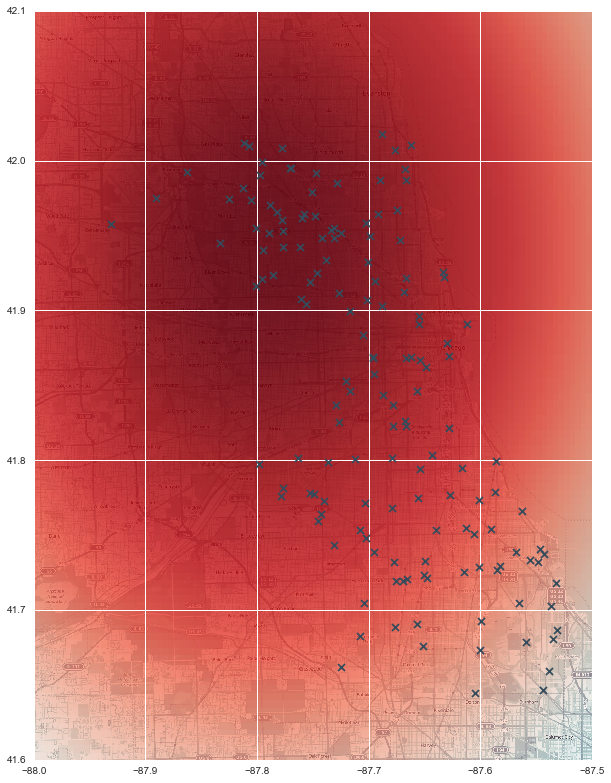

In [578]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("./data/mapdata_copyright_openstreetmap_contributors.txt")
#locations = pd.read_csv('./PREDSMODEL0COMPLETE.csv')[['Longitude', 'Latitude', 'Predictions']]
locations = test34[['Longitude', 'Latitude', 'Predictions']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = locations[locations['Predictions'] > 0]
sigthings = sigthings.groupby(['Longitude', 'Latitude']).max()['Predictions'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=1)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('bone'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = locations[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

plt.savefig('heatmap.png')